# 지하철 승하차 인구로 집, 직장 많은 곳 예상

- 출근시간대: 오전 6시~9시
- 퇴근시간대: 오후 5시~8시

- 출근시간대에 승차>하차 -> 집많은곳
- 출근시간대에 승차<하차 -> 직장 많은곳

- 퇴근시간대에 승차>하차 -> 직장 많은곳
- 퇴근시간대에 승차<하차 -> 집 많은곳

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_2023.csv')
df

,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,2023-01-01,1호선,150,서울역,승차,215,145,231,594,923,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2023-01-01,1호선,150,서울역,하차,154,636,595,939,1306,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,2023-01-01,1호선,151,시청,승차,48,73,106,194,239,...,843,895,959,985,670,630,515,330,146,0
3,2023-01-01,1호선,151,시청,하차,64,247,293,463,522,...,602,575,533,456,285,267,246,154,79,18
4,2023-01-01,1호선,152,종각,승차,407,235,158,201,188,...,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198687,2023-12-31,8호선,2826,수진,하차,5,45,97,72,190,...,192,191,197,222,232,191,171,183,134,73
198688,2023-12-31,8호선,2827,모란,승차,36,68,65,94,132,...,206,209,210,187,144,130,130,145,93,8
198689,2023-12-31,8호선,2827,모란,하차,14,72,50,49,96,...,182,213,190,235,185,190,202,199,106,262
198690,2023-12-31,8호선,2828,남위례,승차,20,52,56,108,154,...,292,309,260,209,121,135,228,178,77,17


In [16]:
# 필요한 컬럼만 뽑아내기
columns_to_keep = ['호선', '역번호', '역명', '구분', '06시-07시', '07시-08시', '08시-09시', '17시-18시', '18시-19시', '19시-20시']
df_need = df[columns_to_keep]

# 일별이 아니라 1년치 한꺼번에 보게 sum 하기
year_df = df_need.groupby(['호선', '역번호', '역명', '구분']).sum().reset_index()

In [17]:
df_승차 = year_df[year_df['구분'] == '승차'].drop(columns=['구분'])
df_하차 = year_df[year_df['구분'] == '하차'].drop(columns=['구분'])

In [18]:
df_combined = df_승차.merge(df_하차, on=['호선', '역번호', '역명'], suffixes=('_승차', '_하차'))

In [19]:
df_combined['출근_승차'] = df_combined['06시-07시_승차'] + df_combined['07시-08시_승차'] + df_combined['08시-09시_승차']
df_combined['출근_하차'] = df_combined['06시-07시_하차'] + df_combined['07시-08시_하차'] + df_combined['08시-09시_하차']
df_combined['퇴근_승차'] = df_combined['17시-18시_승차'] + df_combined['18시-19시_승차'] + df_combined['19시-20시_승차']
df_combined['퇴근_하차'] = df_combined['17시-18시_하차'] + df_combined['18시-19시_하차'] + df_combined['19시-20시_하차']

In [20]:
df_combined = df_combined.drop(labels={'06시-07시_승차', '07시-08시_승차', '08시-09시_승차', '17시-18시_승차', '18시-19시_승차', '19시-20시_승차', '06시-07시_하차', '07시-08시_하차', '08시-09시_하차', '17시-18시_하차', '18시-19시_하차', '19시-20시_하차'}, axis=1)

In [21]:
df_combined['출근_비교'] = df_combined['출근_승차'] - df_combined['출근_하차']
df_combined['퇴근_비교'] = df_combined['퇴근_승차'] - df_combined['퇴근_하차']

In [25]:
df_combined

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교
0,1호선,150,서울역,1198460,3665104,5708841,3068695,-2466644,2640146
1,1호선,151,시청,217737,2673247,3473787,924230,-2455510,2549557
2,1호선,152,종각,219115,3654308,5062363,1527371,-3435193,3534992
3,1호선,153,종로3가,198022,1012858,2850171,1332921,-814836,1517250
4,1호선,154,종로5가,188097,1440646,2811197,1171493,-1252549,1639704
...,...,...,...,...,...,...,...,...,...
272,8호선,2824,단대오거리,1189643,378157,650657,1221282,811486,-570625
273,8호선,2825,신흥,451269,120619,292229,558865,330650,-266636
274,8호선,2826,수진,443870,182642,296945,447149,261228,-150204
275,8호선,2827,모란,224337,181614,384569,313335,42723,71234


In [23]:
df_combined.to_csv('서울교통공사_역별 승하차 비교_2023.csv', index=False)

In [27]:
df_subdong = pd.read_csv('서울교통공사_역별_승하차_비교_2023_행정동_완료.csv')
df_subdong

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
0,1호선,150,서울역,1198460,3665104,5708841,3068695,-2466644,2640146,중구 소공동
1,1호선,151,시청,217737,2673247,3473787,924230,-2455510,2549557,중구 태평로1가
2,1호선,152,종각,219115,3654308,5062363,1527371,-3435193,3534992,종로구 종로1가
3,1호선,153,종로3가,198022,1012858,2850171,1332921,-814836,1517250,종로구 종로3가
4,1호선,154,종로5가,188097,1440646,2811197,1171493,-1252549,1639704,종로구 종로5가
...,...,...,...,...,...,...,...,...,...,...
272,8호선,2824,단대오거리,1189643,378157,650657,1221282,811486,-570625,성남시 중원구 성남동
273,8호선,2825,신흥,451269,120619,292229,558865,330650,-266636,성남시 수정구 신흥3동
274,8호선,2826,수진,443870,182642,296945,447149,261228,-150204,성남시 수정구 수진1동
275,8호선,2827,모란,224337,181614,384569,313335,42723,71234,성남시 중원구 성남동


In [30]:
# 서울 이외 지역 지우기
df_subdong = df_subdong[~df_subdong['행정동'].str.contains('성남시|부천시|광명시')]

In [34]:
df_subdong

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
0,1호선,150,서울역,1198460,3665104,5708841,3068695,-2466644,2640146,중구 소공동
1,1호선,151,시청,217737,2673247,3473787,924230,-2455510,2549557,중구 태평로1가
2,1호선,152,종각,219115,3654308,5062363,1527371,-3435193,3534992,종로구 종로1가
3,1호선,153,종로3가,198022,1012858,2850171,1332921,-814836,1517250,종로구 종로3가
4,1호선,154,종로5가,188097,1440646,2811197,1171493,-1252549,1639704,종로구 종로5가
...,...,...,...,...,...,...,...,...,...,...
265,8호선,2817,송파,715938,334162,531394,860698,381776,-329304,송파구 송파1동
266,8호선,2818,가락시장,293501,563765,683523,611053,-270264,72470,송파구 가락본동
267,8호선,2819,문정,602052,2144360,2615381,979525,-1542308,1635856,송파구 문정2동
268,8호선,2820,장지,1173830,802391,1373502,1338428,371439,35074,송파구 장지동


In [35]:
# Function to process '행정동' as per user's request
def process_hangjeongdong(hangjeongdong):
    if hangjeongdong.endswith('구'):
        return ''
    elif hangjeongdong.endswith('동'):
        return hangjeongdong
    else:
        return hangjeongdong + '동'

# Apply the function to the '행정동' column
df_subdong['행정동'] = df_subdong['행정동'].apply(lambda x: ' '.join([process_hangjeongdong(part) for part in x.split() if process_hangjeongdong(part)]))

df_subdong

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
0,1호선,150,서울역,1198460,3665104,5708841,3068695,-2466644,2640146,소공동
1,1호선,151,시청,217737,2673247,3473787,924230,-2455510,2549557,태평로1가동
2,1호선,152,종각,219115,3654308,5062363,1527371,-3435193,3534992,종로1가동
3,1호선,153,종로3가,198022,1012858,2850171,1332921,-814836,1517250,종로3가동
4,1호선,154,종로5가,188097,1440646,2811197,1171493,-1252549,1639704,종로5가동
...,...,...,...,...,...,...,...,...,...,...
265,8호선,2817,송파,715938,334162,531394,860698,381776,-329304,송파1동
266,8호선,2818,가락시장,293501,563765,683523,611053,-270264,72470,가락본동
267,8호선,2819,문정,602052,2144360,2615381,979525,-1542308,1635856,문정2동
268,8호선,2820,장지,1173830,802391,1373502,1338428,371439,35074,장지동


In [36]:
df_subdong
df_subdong.to_csv('서울교통공사_역별 승하차 비교_행정동추가_동만남김_2023.csv', index=False)

# 여기서부터 실행

In [3]:
df_subdong = pd.read_csv('서울교통공사_역별 승하차 비교_행정동추가_동만남김_2023_modified.csv')
df_subdong

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
0,1호선,150,서울역,1198460,3665104,5708841,3068695,-2466644,2640146,소공동
1,1호선,151,시청,217737,2673247,3473787,924230,-2455510,2549557,소공동
2,1호선,152,종각,219115,3654308,5062363,1527371,-3435193,3534992,종로1.2.3.4가동
3,1호선,153,종로3가,198022,1012858,2850171,1332921,-814836,1517250,종로1.2.3.4가동
4,1호선,154,종로5가,188097,1440646,2811197,1171493,-1252549,1639704,종로5.6가동
...,...,...,...,...,...,...,...,...,...,...
261,8호선,2817,송파,715938,334162,531394,860698,381776,-329304,송파1동
262,8호선,2818,가락시장,293501,563765,683523,611053,-270264,72470,가락본동
263,8호선,2819,문정,602052,2144360,2615381,979525,-1542308,1635856,문정2동
264,8호선,2820,장지,1173830,802391,1373502,1338428,371439,35074,장지동


In [5]:
# 출근시간대 집 많은 곳: 출근시간대에 승차 > 하차
집_많은_곳 = df_subdong[df_subdong['출근_비교'] > 0].sort_values(by='출근_비교', ascending=False)

# 출근시간대 직장 많은 곳: 출근시간대에 승차 < 하차
직장_많은_곳 = df_subdong[df_subdong['출근_비교'] < 0].sort_values(by='출근_비교')

# 퇴근시간대 직장 많은 곳: 퇴근시간대에 승차 > 하차
퇴근_직장_많은_곳 = df_subdong[df_subdong['퇴근_비교'] > 0].sort_values(by='퇴근_비교', ascending=False)

# 퇴근시간대 집 많은 곳: 퇴근시간대에 승차 < 하차
퇴근_집_많은_곳 = df_subdong[df_subdong['퇴근_비교'] < 0].sort_values(by='퇴근_비교')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

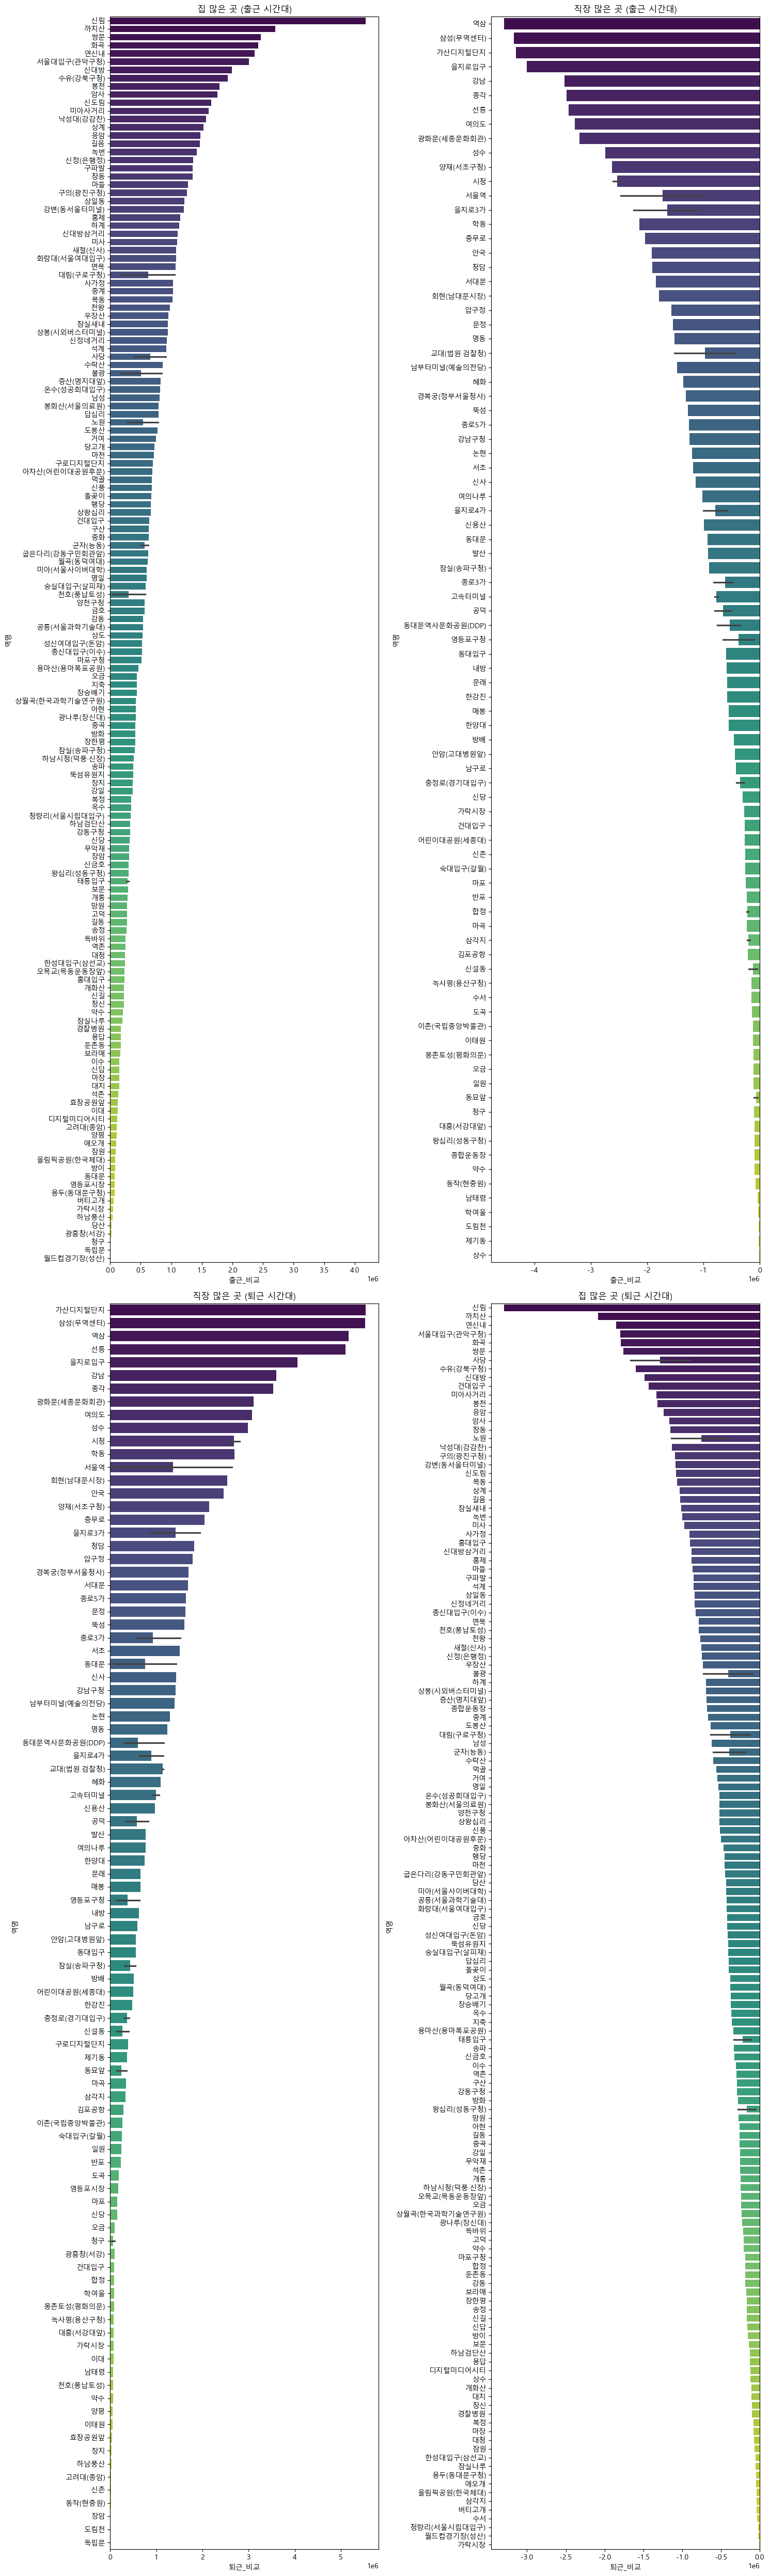

In [7]:
# 크기조정
fig, axes = plt.subplots(2, 2, figsize=(15, 50))

# 시각화
sns.barplot(ax=axes[0, 0], x='출근_비교', y='역명', data=집_많은_곳, palette='viridis')
axes[0, 0].set_title('집 많은 곳 (출근 시간대)')

sns.barplot(ax=axes[0, 1], x='출근_비교', y='역명', data=직장_많은_곳, palette='viridis')
axes[0, 1].set_title('직장 많은 곳 (출근 시간대)')

sns.barplot(ax=axes[1, 0], x='퇴근_비교', y='역명', data=퇴근_직장_많은_곳, palette='viridis')
axes[1, 0].set_title('직장 많은 곳 (퇴근 시간대)')

sns.barplot(ax=axes[1, 1], x='퇴근_비교', y='역명', data=퇴근_집_많은_곳, palette='viridis')
axes[1, 1].set_title('집 많은 곳 (퇴근 시간대)')

plt.tight_layout()
plt.show()

# 내일 진행할 것
- 실제 거주 인구, 직장 인구 데이터를 가져와서 이렇게 예측한 게 맞는지 상관관계 분석 진행
- 지도api가져와서 서울시 지도 가져와서 지도 위에 시각화 해보기

- 승하차 인구에 따른 대여, 반납 예상하기


In [3]:
home_df = pd.read_csv('서울시 상권분석서비스(상주인구-행정동)_20231분기.csv')
work_df = pd.read_csv('서울시 상권분석서비스(직장인구-행정동)_20231분기.csv')

In [8]:
home_work_df = pd.merge(home_df, work_df, on=['기준_년분기_코드','행정동_코드','행정동_코드_명'])

In [10]:
home_work_df.to_csv('서울시 상권분석서비스(상주인구,직장인구-행정동)_20231분기.csv', index=False)

# 여기서부터 실행

In [11]:
home_work_df = pd.read_csv('서울시 상권분석서비스(상주인구,직장인구-행정동)_20231분기.csv')
home_work_df

,기준_년분기_코드,행정동_코드,행정동,총_상주인구_수,총_가구_수,총_직장_인구_수
0,20231,11110690,창신3동,6905,2911,300
1,20231,11170700,보광동,14985,7784,1059
2,20231,11170560,원효로1동,12933,8035,4677
3,20231,11170625,한강로동,12463,10405,47142
4,20231,11215840,자양3동,28608,11170,3370
...,...,...,...,...,...,...
420,20231,11110550,부암동,9744,4389,4115
421,20231,11110530,사직동,8486,4758,47822
422,20231,11110570,무악동,8491,3189,608
423,20231,11110580,교남동,4425,4594,847


In [12]:
# 출근시간대 집 많은 곳: 출근시간대에 승차 > 하차
집_많은_곳

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
39,2호선,230,신림,5038703,857027,2541701,5838360,4181676,-3296659,신림동
128,5호선,2519,까치산,3103499,406154,1047338,3128452,2697345,-2081114,화곡본동
98,4호선,413,쌍문,2956318,493567,1168820,2929195,2462751,-1760375,쌍문1동
127,5호선,2518,화곡,2975431,548608,1234357,3024252,2426823,-1789895,화곡본동
62,3호선,311,연신내,3025596,665069,1666148,3516481,2360527,-1850333,불광2동
...,...,...,...,...,...,...,...,...,...,...
46,2호선,237,당산,1128487,1103583,1427930,1862201,24904,-434271,당산1동
190,6호선,2625,광흥창(서강),528454,509358,748244,652987,19096,95257,신수동
147,5호선,2538,청구,197664,188177,324943,289015,9487,35928,신당5동
67,3호선,316,독립문,391424,384822,524835,522318,6602,2517,홍제동


In [13]:
# 출근시간대 직장 많은 곳: 출근시간대에 승차 < 하차
직장_많은_곳

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
30,2호선,221,역삼,494467,5037117,6950710,1777277,-4542650,5173433,역삼1동
28,2호선,219,삼성(무역센터),399413,4769718,7603550,2071288,-4370305,5532262,삼성1동
252,7호선,2748,가산디지털단지,583399,4912029,6606887,1065096,-4328630,5541791,가산동
11,2호선,202,을지로입구,320442,4458992,6209787,2148645,-4138550,4061142,을지로동
31,2호선,222,강남,1165123,4636570,8502289,4898023,-3471447,3604266,역삼1동
...,...,...,...,...,...,...,...,...,...,...
202,6호선,2637,동묘앞,296476,330052,707567,564046,-33576,143521,숭인1동
87,3호선,336,학여울,108183,131301,235851,150472,-23118,85379,대치동
56,2호선,247,도림천,78227,94720,98452,92673,-16493,5779,구로5동
7,1호선,157,제기동,610342,626694,1336786,965867,-16352,370919,제기동


In [14]:
# 퇴근시간대 직장 많은 곳: 퇴근시간대에 승차 > 하차
퇴근_직장_많은_곳

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
252,7호선,2748,가산디지털단지,583399,4912029,6606887,1065096,-4328630,5541791,가산동
28,2호선,219,삼성(무역센터),399413,4769718,7603550,2071288,-4370305,5532262,삼성1동
30,2호선,221,역삼,494467,5037117,6950710,1777277,-4542650,5173433,역삼1동
29,2호선,220,선릉,643016,4040805,6946107,1838104,-3397789,5108003,삼성2동
11,2호선,202,을지로입구,320442,4458992,6209787,2148645,-4138550,4061142,을지로동
...,...,...,...,...,...,...,...,...,...,...
49,2호선,240,신촌,1022162,1281440,3234810,3212672,-259278,22138,서강동
116,4호선,431,동작(현충원),62578,130670,165706,149550,-68092,16156,노량진2동
215,7호선,2711,장암,355617,44599,112762,102834,311018,9928,도봉2동
56,2호선,247,도림천,78227,94720,98452,92673,-16493,5779,구로5동


In [15]:
# 퇴근시간대 집 많은 곳: 퇴근시간대에 승차 < 하차
퇴근_집_많은_곳

,호선,역번호,역명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,출근_비교,퇴근_비교,행정동
39,2호선,230,신림,5038703,857027,2541701,5838360,4181676,-3296659,신림동
128,5호선,2519,까치산,3103499,406154,1047338,3128452,2697345,-2081114,화곡본동
62,3호선,311,연신내,3025596,665069,1666148,3516481,2360527,-1850333,불광2동
37,2호선,228,서울대입구(관악구청),3307051,1036458,2710730,4506043,2270593,-1795313,봉천1동
127,5호선,2518,화곡,2975431,548608,1234357,3024252,2426823,-1789895,화곡본동
...,...,...,...,...,...,...,...,...,...,...
198,6호선,2633,버티고개,142883,86563,154984,191540,56320,-36556,신당5동
90,3호선,339,수서,913962,1058030,1482216,1516737,-144068,-34521,수서동
8,1호선,158,청량리(서울시립대입구),1039072,699542,1507197,1524330,339530,-17133,전농1동
185,6호선,2620,월드컵경기장(성산),201572,201531,522825,538879,41,-16054,성산1동


In [23]:
# '행정동'기준으로 데이터프레임들 merge
출근_집_많은_곳_merged = pd.merge(집_많은_곳, home_work_df, left_on='행정동', right_on='행정동')

퇴근_집_많은_곳_merged = pd.merge(퇴근_집_많은_곳, home_work_df, left_on='행정동', right_on='행정동')

출근_직장_많은_곳_merged = pd.merge(직장_많은_곳, home_work_df, left_on='행정동', right_on='행정동')

퇴근_직장_많은_곳_merged = pd.merge(퇴근_직장_많은_곳, home_work_df, left_on='행정동', right_on='행정동')

In [24]:
# corr
출근_집_많은_곳_corr = 출근_집_많은_곳_merged[['출근_비교','퇴근_비교', '총_상주인구_수', '총_가구_수', '총_직장_인구_수']].corr()

퇴근_집_많은_곳_corr = 퇴근_집_많은_곳_merged[['출근_비교','퇴근_비교', '총_상주인구_수', '총_가구_수', '총_직장_인구_수']].corr()

출근_직장_많은_곳_corr = 출근_직장_많은_곳_merged[['출근_비교','퇴근_비교', '총_상주인구_수', '총_가구_수', '총_직장_인구_수']].corr()

퇴근_직장_많은_곳_corr = 퇴근_직장_많은_곳_merged[['출근_비교','퇴근_비교', '총_상주인구_수', '총_가구_수', '총_직장_인구_수']].corr()

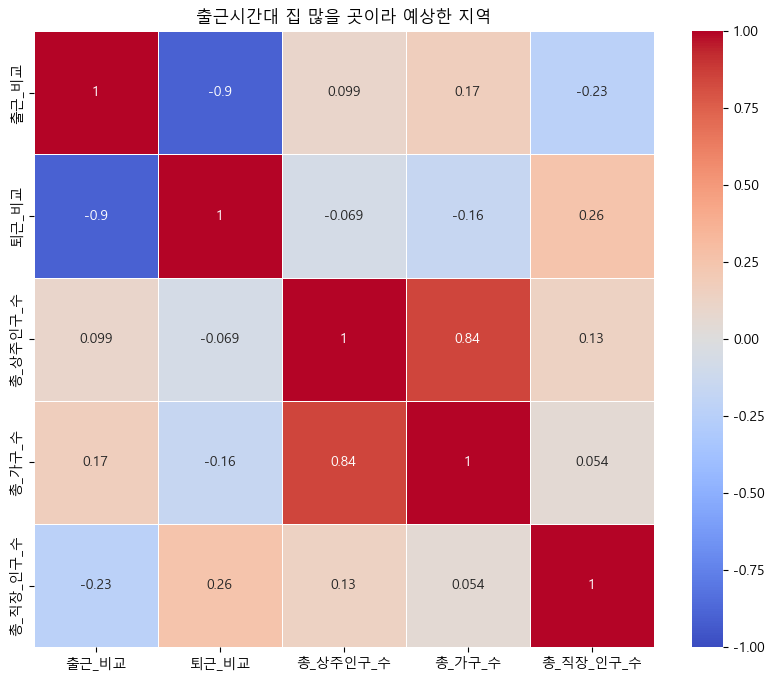

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(출근_집_많은_곳_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('출근시간대 집 많을 곳이라 예상한 지역')
plt.show()

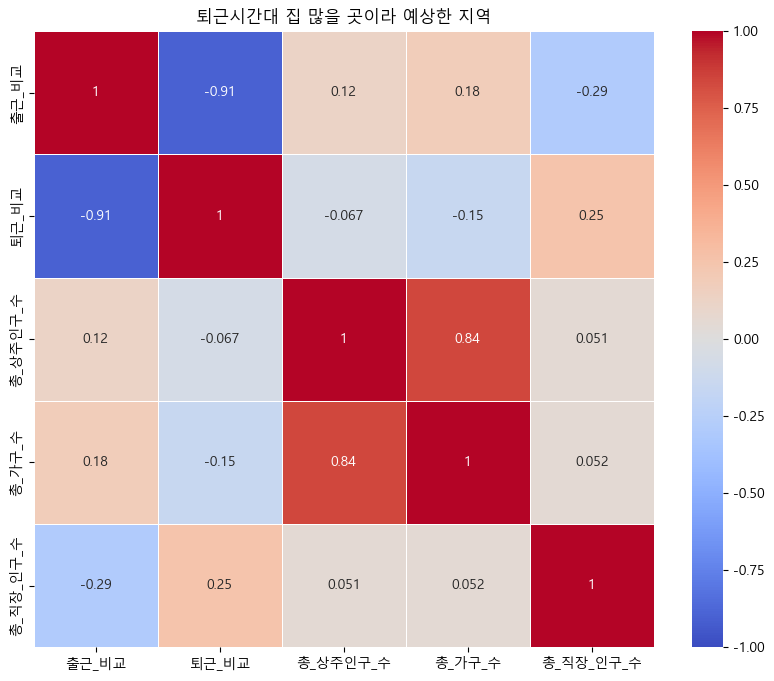

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(퇴근_집_많은_곳_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('퇴근시간대 집 많을 곳이라 예상한 지역')
plt.show()

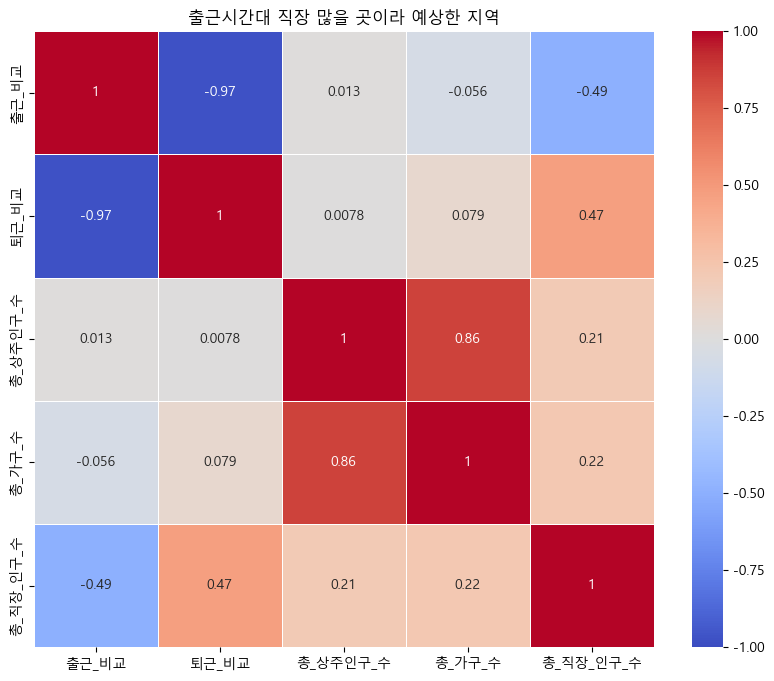

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(출근_직장_많은_곳_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('출근시간대 직장 많을 곳이라 예상한 지역')
plt.show()

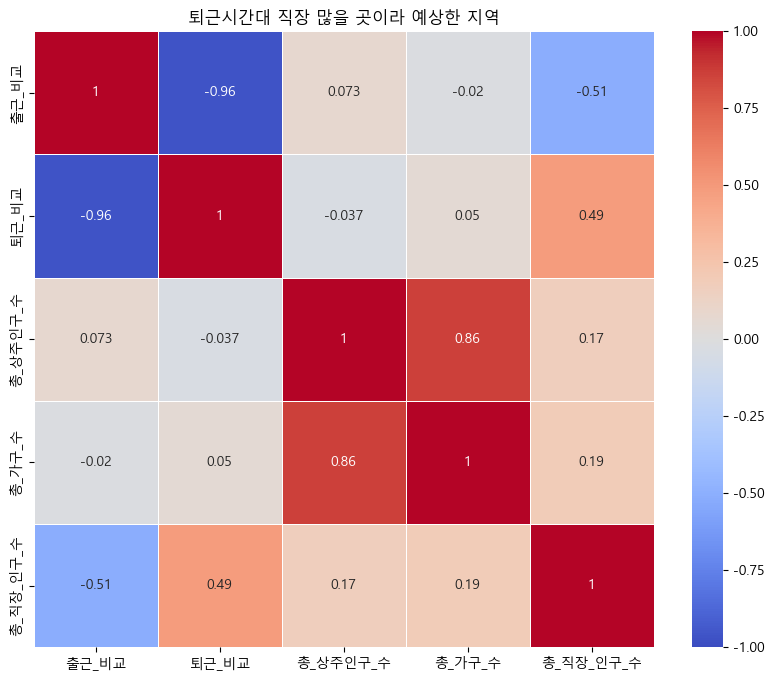

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(퇴근_직장_많은_곳_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('퇴근시간대 직장 많을 곳이라 예상한 지역')
plt.show()